### Martina Crippa - 915326

# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>

## <span style="color:blue">  Numerical exercises 8 - SOLUTION</span>

All c++ code is stored into exercize_xx/es_xx.x folder, for every point of exercizes.
All data are stored into exercize_xx/data/ folder.

### Exercise 08.2

I write a program to estimate the expectation value for the hamiltonian $\langle {\hat H} \rangle_T$ defined as
$$
 {\hat H}  =  {\hat T} +x^4 - \frac{5}{2}x^2
$$
I use the trial wave function
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

with $\mu$ and $\sigma$ to estimate variationally, then I sample x with Metropolis algorithm from $|\Psi_T^{\sigma,\mu}(x)|^2$ using an uniform transition probability.

- First I search for $\mu$ and $\sigma$ parameters that minimize energy in the intervals $\mu\in(0.75, 0.90)$ and $\sigma\in(0.55, 0.7)$, using a matrix of these parameters generated by loop.sh and stored in mu_sigma.in, with run_variational.sh script to run the program with different parameters (and "variational" flag setted true").

Minimum energy: -0.393513


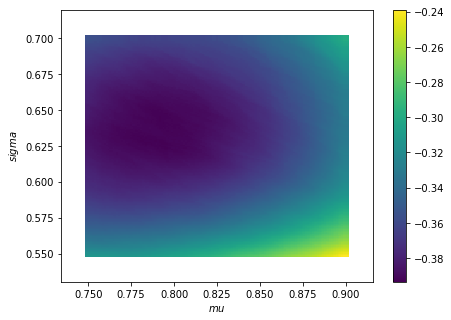

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.optimize import curve_fit
from matplotlib.mlab import griddata

# generate 2 2d grids for the x & y bounds
x, y, z = np.loadtxt("data/variational_energy.dat",\
                     usecols=(0,1,2), unpack='true')

print("Minimum energy: "+str(min(z)))
plt.figure(figsize=(7,5))
plt.scatter(x,y,c=z, linewidths=0, label="unfrustrated", marker='s');
plt.xlabel('$mu$')
plt.ylabel('$sigma$')
plt.colorbar()
plt.show()

As we can see from the scatter plot, $\mu\in(0.78,0.8)$ and $\sigma\in(0.60,0.65)$ minimize energy, so I can manually search for these values ad set $\mu=0.795$, $\sigma=0.629$.

- I run main.exe with the selected parameters passed by command line, and with "variational" flag set false: in the first picture below we can see the estimate value for the energy computed with $\mu$ and $\sigma$ parameters obtained in the first step.

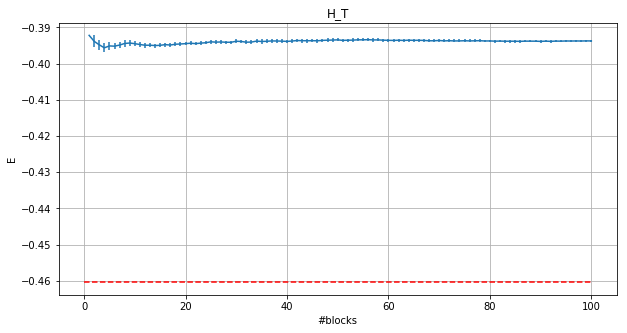

In [41]:
# To read data from file
x, y, err_prog = np.loadtxt("data/output_es08.2.dat", \
                               usecols=(0,1,2), delimiter=' ', unpack='true')
plt.figure(figsize=(10,5))
plt.errorbar(x,y,yerr=err_prog)
# Plot horizontal line at y, from xmin to xmax
plt.hlines(-0.46046587969271563, 0, 100, colors='r', linestyles='dashed')
plt.title('H_T')
plt.xlabel('#blocks')
plt.ylabel('E')
plt.grid(True)
plt.show()    


In the picture below I plot the sampled quare modulus wave function, the numerical solution and the analytical one (not normalized).

In [42]:
# Computing the numerical wf
def Vpot(x):
    return (x**2 - 2.5)*x**2

hbar = 1
m = 1
a = 6
N = 100 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)
scale = 0.3


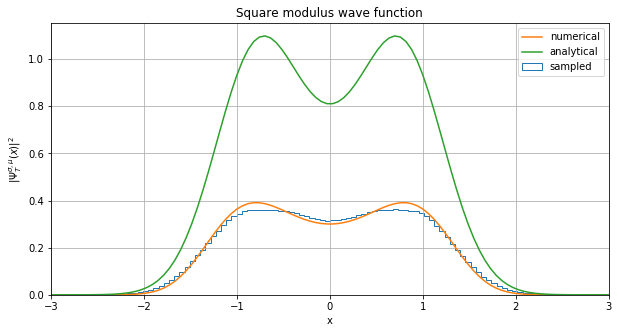

In [43]:
plt.figure(figsize=(10,5))

# Sampled points
sampled = np.loadtxt("data/output_es08.2_sampled.dat")
n_bins=100
plt.hist(sampled, n_bins, density='true', histtype='step', label='sampled')

# Numerical
plt.plot(x,(psi[0])**2, label='numerical')

# Analytical
mu=0.795
sigma=0.629
def psi_sq(x):
    return np.exp(-(x-mu)**2/sigma**2)+np.exp(-(x+mu)**2/sigma**2)+\
    2*np.exp(-(x-mu)**2/(2*sigma**2))*np.exp(-(x+mu)**2/(2*sigma**2))
plt.plot(x, psi_sq(x), label="analytical")

ax = plt.gca()
ax.set_xlim(-3,3)
plt.title("Square modulus wave function")
plt.xlabel("x")
plt.ylabel("$|\Psi_T^{\sigma,\mu}(x)|^2$")
plt.legend()
plt.grid(True)

plt.show()


### Exercise 08.3

- I sample the square modulus wave function with PIGS ($T=0$).

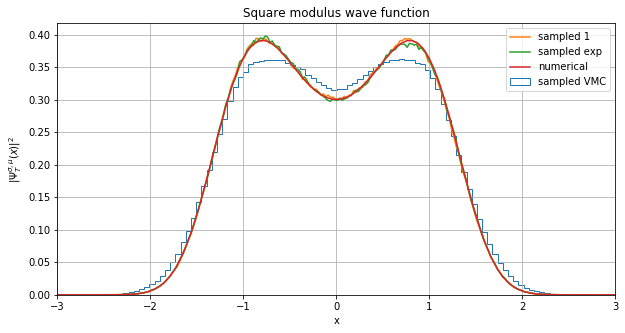

In [44]:
plt.figure(figsize=(10,5))

# Sampled points
sampled = np.loadtxt("data/output_es08.2_sampled.dat")
n_bins=100
plt.hist(sampled, n_bins, density='true', histtype='step', label='sampled VMC')


x1, sampled_1 = np.loadtxt("data/probability_1.dat",  usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x1, sampled_1, label='sampled 1')

xexp, sampled_exp = np.loadtxt("data/probability_exp.dat",  usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(xexp, sampled_exp, label='sampled exp')

# Numerical
plt.plot(x,(psi[0])**2, label='numerical')

ax = plt.gca()
ax.set_xlim(-3,3)
plt.title("Square modulus wave function")
plt.xlabel("x")
plt.ylabel("$|\Psi_T^{\sigma,\mu}(x)|^2$")
plt.legend()
plt.grid(True)

plt.show()

We can see that PIGS sampled wave function approximate better numerical solution than VMC one both for  $\Psi_T(x)=1$ and $\Psi_T^{\sigma,\mu}(x)$.

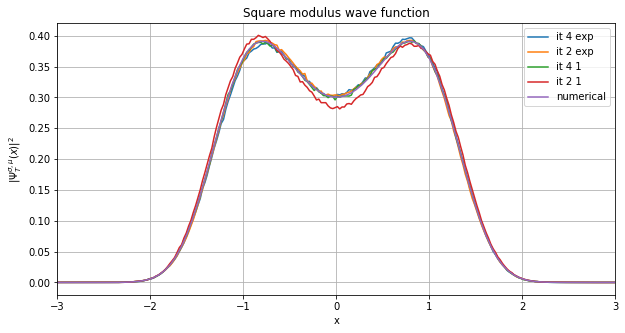

In [45]:
plt.figure(figsize=(10,5))

# Sampled points
xit4_exp, sampled_it4_exp = np.loadtxt("data/probability_it4_exp.dat",  usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(xit4_exp, sampled_it4_exp, label='it 4 exp')
xit2_exp, sampled_it2_exp = np.loadtxt("data/probability_it2_exp.dat",  usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(xit2_exp, sampled_it2_exp, label='it 2 exp')

xit4_1, sampled_it4_1 = np.loadtxt("data/probability_it4_1.dat",  usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(xit4_1, sampled_it4_1, label='it 4 1')
xit2_1, sampled_it2_1 = np.loadtxt("data/probability_it2_1.dat",  usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(xit2_1, sampled_it2_1, label='it 2 1')

# Numerical
plt.plot(x,(psi[0])**2, label='numerical')

ax = plt.gca()
ax.set_xlim(-3,3)
plt.title("Square modulus wave function")
plt.xlabel("x")
plt.ylabel("$|\Psi_T^{\sigma,\mu}(x)|^2$")
plt.legend()
plt.grid(True)

plt.show()

As reported in graph, we can see that for a flat trial wave function below imaginary time set to $2$ it start to approximate worse numerical solution; on the contrary for $\Psi_T^{\sigma,\mu}(x)$ an imaginary time set to $2$ is enough.

- Now I use PIMC to sample $\Psi_T^{\sigma,\mu}(x)$ at different temperature, with optimal value of $\mu$ and $\sigma$.

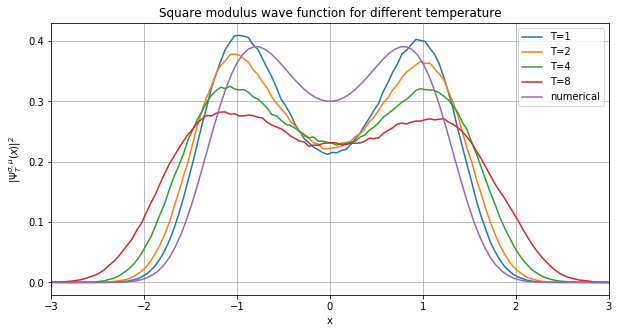

In [46]:
plt.figure(figsize=(10,5))

# Sampled points for trial wave function
xT1, sampled_T1 = np.loadtxt("data/probability_T1.dat",  usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(xT1, sampled_T1, label='T=1')

xT2, sampled_T2 = np.loadtxt("data/probability_T2.dat",  usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(xT2, sampled_T2, label='T=2')

xT4, sampled_T4 = np.loadtxt("data/probability_T4.dat",  usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(xT4, sampled_T4, label='T=4')

xT8, sampled_T8 = np.loadtxt("data/probability_T8.dat",  usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(xT8, sampled_T8, label='T=8')

# Numerical
plt.plot(x,(psi[0])**2, label='numerical')

ax = plt.gca()
ax.set_xlim(-3,3)
plt.title("Square modulus wave function for different temperature")
plt.xlabel("x")
plt.ylabel("$|\Psi_T^{\sigma,\mu}(x)|^2$")
plt.legend()
plt.grid(True)

plt.show()